In [1]:
#import modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
product_names = []   # List to store names of the products
product_prices = []     # List to store prices of the products

In [3]:
#Pull website to scrape
Rq = requests.get('https://shopzetu.com/collections/bags')
soup = BeautifulSoup(Rq.content, 'html.parser')

In [4]:
#get data from the website and store in the lists created
for product in soup.find_all('div', attrs={'class':'grid-product__meta'}):
    name = product.find('div', attrs={'class':'grid-product__title grid-product__title--body'})
    price = product.find('div', attrs={'class':'grid-product__price'}).text.strip()
    price = price.replace('KSh', '').split('.')[0].strip()
    product_names.append(name.text)
    product_prices.append(price)
    product_names = product_names[:15] # taking 15 rows only for graph
    product_prices = product_prices[:15] # taking 15 rows only for graph

In [5]:
# Convert product prices from strings to integers
product_prices_integers = []
for item in product_prices:
    price_integer = int(item.replace(',', ''))
    product_prices_integers.append(price_integer)

In [6]:
# Merge the two lists (product_names and product_prices_integers) into a list of
# tuples (product_details) so that the resultant list can be sorted in descending order
# in the next cell
product_details = []

for i in range(len(product_names)):

    product_details.append((product_names[i], product_prices_integers[i]))

In [7]:
# sort the list of tuples (product_details) in descending order
product_details.sort(key=lambda x: x[1], reverse = True)

In [8]:
# Recreate the 2 lists (product_names and product_prices)
product_names = []
product_prices = []
for item in product_details:
    product_names.append(item[0])
    product_prices.append(item[1])  

In [9]:
# store the data in pandas DataFrame
data = {'Product Name': product_names, 'Price': product_prices}
df = pd.DataFrame(data)

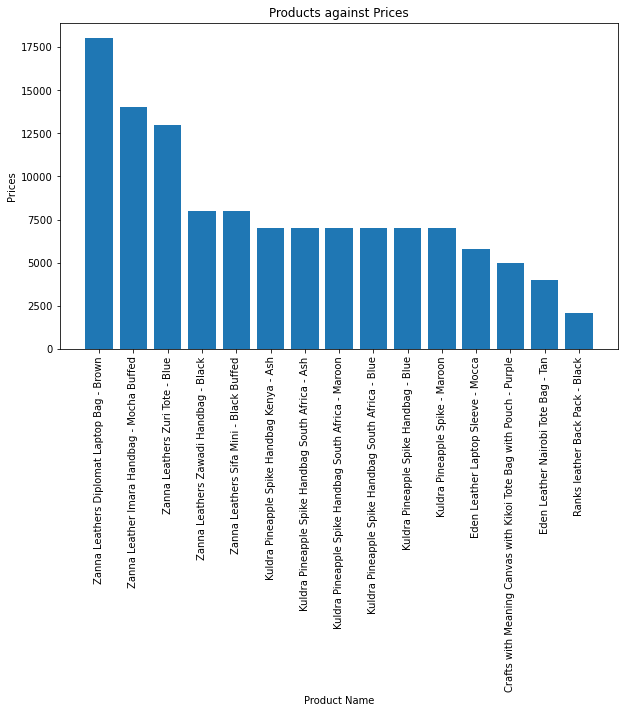

In [10]:
# Read from the dataframe and visualize the data
plt.figure(figsize=(10, 6))
plt.bar(df['Product Name'], df['Price'])
plt.xlabel('Product Name')
plt.ylabel('Prices')
plt.title('Products against Prices')
plt.xticks(rotation=90)
plt.show()

In [11]:
# additional - Save the DataFrame to a CSV file
df.to_csv('product_data.csv', index=False)